## Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, accuracy_score,f1_score, precision_score
from sklearn.naive_bayes import MultinomialNB


## Read in cleaned data

In [2]:
df_subreddits = pd.read_csv('/Users/annarutledge/Documents/general_assembly/submissions22/projects/project-3-master/data/subreddits.csv')

In [3]:
df_subreddits.head()

,title,text,auth,time,subreddit,full_text,letter_count,word_count,subreddit_code
0,"Every woman who is not lesbian is gay, (girls ...",NaN,Altruistic_Rest_9861,1643317371,showerthoughts,"Every woman who is not lesbian is gay, (girls ...",131,26,0
1,Everyone keeps their phone on silent because w...,NaN,smcmahon710,1643317311,showerthoughts,Everyone keeps their phone on silent because w...,81,13,0
2,A good book will always be new.,NaN,agreatday248,1643317210,showerthoughts,A good book will always be new.,31,7,0
3,"Science can either prove that no deity exists,...",NaN,shimkei,1643317183,showerthoughts,"Science can either prove that no deity exists,...",132,26,0
4,The fact that I have to actively remind myself...,NaN,DawnMayRise,1643317126,showerthoughts,The fact that I have to actively remind myself...,118,22,0


## Train - Test - Split

In [5]:
X = df_subreddits['full_text']

y = df_subreddits['subreddit']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

In [7]:
X_train.shape

(14548,)

In [8]:
X_test.shape

(4850,)

In [9]:
y_train.shape

(14548,)

In [10]:
y_test.shape

(4850,)

## Naive Bayes model

In [11]:
cv = CountVectorizer()

In [12]:
nb = MultinomialNB()

In [13]:
pipe = make_pipeline(cv, nb)

In [14]:
params = {
    'multinomialnb__alpha':[0.1, 2], 
    'countvectorizer__ngram_range':[(1,2), (1,3)], 
    'countvectorizer__max_df':[0.8, 0.9, 1],
    'countvectorizer__min_df':[0, 0.1, 0.2],
    'countvectorizer__stop_words':[None, 'english']
}

In [15]:
gs = GridSearchCV(pipe, params, n_jobs=-1)

In [16]:
gs.fit(X_train, y_train)

/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 348, in _fit
    X,

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('multinomialnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_df': [0.8, 0.9, 1],
                         'countvectorizer__min_df': [0, 0.1, 0.2],
                         'countvectorizer__ngram_range': [(1, 2), (1, 3)],
                         'countvectorizer__stop_words': [None, 'english'],
                         'multinomialnb__alpha': [0.1, 2]})

In [17]:
gs.best_estimator_

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=0.8, min_df=0, ngram_range=(1, 2))),
                ('multinomialnb', MultinomialNB(alpha=0.1))])

In [28]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_countvectorizer__max_df,param_countvectorizer__min_df,param_countvectorizer__ngram_range,param_countvectorizer__stop_words,param_multinomialnb__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.536943,0.057344,0.201326,0.019447,0.8,0,"(1, 2)",None,0.1,"{'countvectorizer__max_df': 0.8, 'countvectori...",0.813746,0.804811,0.804467,0.818151,0.807838,0.809802,0.005338,1
1,1.492611,0.103448,0.209809,0.013244,0.8,0,"(1, 2)",None,2,"{'countvectorizer__max_df': 0.8, 'countvectori...",0.641924,0.637457,0.649828,0.641458,0.647989,0.643731,0.004541,22
2,1.055174,0.033841,0.140821,0.013004,0.8,0,"(1, 2)",english,0.1,"{'countvectorizer__max_df': 0.8, 'countvectori...",0.743299,0.756014,0.748797,0.762118,0.749398,0.751925,0.006499,7
3,1.098522,0.010460,0.140514,0.017531,0.8,0,"(1, 2)",english,2,"{'countvectorizer__max_df': 0.8, 'countvectori...",0.651546,0.652577,0.658763,0.657614,0.664833,0.657067,0.004778,18
4,3.231709,0.142607,0.336878,0.061764,0.8,0,"(1, 3)",None,0.1,"{'countvectorizer__max_df': 0.8, 'countvectori...",0.808591,0.803093,0.803093,0.815400,0.811963,0.808428,0.004859,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.651760,0.042480,0.000000,0.000000,1,0.2,"(1, 2)",english,2,"{'countvectorizer__max_df': 1, 'countvectorize...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,55
68,1.492569,0.038819,0.000000,0.000000,1,0.2,"(1, 3)",None,0.1,"{'countvectorizer__max_df': 1, 'countvectorize...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,56
69,1.503588,0.040491,0.000000,0.000000,1,0.2,"(1, 3)",None,2,"{'countvectorizer__max_df': 1, 'countvectorize...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,57
70,0.940078,0.045438,0.000000,0.000000,1,0.2,"(1, 3)",english,0.1,"{'countvectorizer__max_df': 1, 'countvectorize...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,68


In [18]:
y_preds = gs.predict(X_test)

In [19]:
y_preds

array(['crazyideas', 'crazyideas', 'showerthoughts', ..., 'crazyideas',
       'showerthoughts', 'crazyideas'], dtype='<U14')

### Accuracy score

In [21]:
gs.score(X_test, y_test)

0.805360824742268

In [22]:
accuracy_score(y_test, y_preds)

0.805360824742268

### Recall/sensitivity score

In [24]:
recall_score(y_test, y_preds, pos_label='crazyideas')

0.8810679611650486

### Precision score

In [25]:
precision_score(y_test, y_preds, pos_label='crazyideas')

0.7701555869872702

### F1 Score

In [26]:
f1_score(y_test, y_preds, pos_label='crazyideas')

0.8218867924528303

### Confusion Matrix

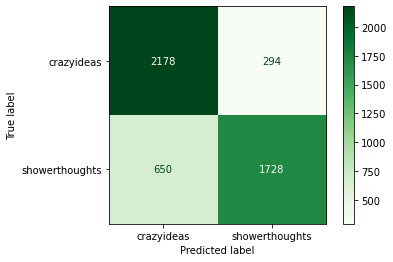

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap='Greens')